In [13]:
#Name: Nihar Koppolu
#Advisor: Christof Teuscher

#Purpose: The purpose of this code is to manage the read in phase, create all reservoirs and generate all data sets related to reservoir accuracy.
#         This is the CLIENT program.

In [14]:
import import_ipynb
#from Data_Processing_Class import Data_Processor as Dp
import Data_Processing_Class
import CGM_Reservoir_Class

76
day time: 12.193888888888889
glucose level: 160
# points:  296


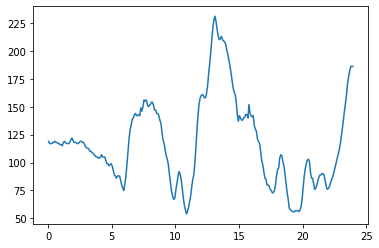

In [15]:
Data_Set = Data_Processing_Class.Data_Processor()
Data_Set.Read_Raw_Data()
Data_Set.Process_Raw_Data()
Data_Set.Graph_Single_Date()